## An Exploratory Data Analysis from Anxiety Attack dataset 
    - This dataset contains records detailing various factors related to anxiety attacks, including demographics, lifestyle habits, stress levels, and physiological responses.
    - Dataset from: https://www.kaggle.com/datasets/ashaychoudhary/anxiety-attack-factors-symptoms-and-severity
    * Key Features:
        - Demographics: Age, Gender, Occupation
        - Lifestyle Factors: Sleep, Physical Activity, Diet, Caffeine & Alcohol Intake
        - Health Indicators: Heart Rate, Breathing Rate, Sweating, Dizziness
        - Psychological Factors: Stress Level, Family History, Therapy & Medication
        - Anxiety Attack Severity: Scale from 1 to 10

### Objectives of the analysis:
- Identify the most commom anxiety triggers & symptoms;
- I will try to find some common causes for those who suffer from anxiety attacks


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm

In [2]:
# input data files
df = pd.read_csv('anxiety_attack_dataset.csv')

In [3]:
# exploring the data
df.head(10)

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1
5,6,38,Male,Student,6.7,9.9,194,16,No,Yes,2,174,25,3,No,Yes,2,Yes,1,8
6,7,56,Male,Doctor,3.8,7.5,411,13,Yes,Yes,2,81,22,4,No,No,5,Yes,10,10
7,8,36,Male,Teacher,4.9,0.5,413,4,No,No,3,88,36,5,No,Yes,6,No,4,2
8,9,40,Male,Doctor,6.2,9.0,284,6,No,No,4,121,28,2,No,No,0,No,5,4
9,10,28,Female,Doctor,8.3,9.3,148,18,No,Yes,5,145,12,4,No,No,3,No,10,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

In [5]:
df.isnull().sum()

ID                                   0
Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm during attack)       0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Severity of Anxiety Attack (1-10)    0
dtype: int64

In [6]:
# There is no null data

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
# No duplicated data as well

In [9]:
df.describe()

,ID,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Severity of Anxiety Attack (1-10)
count,12000.00000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,40.96675,6.482650,5.030892,246.696083,9.492833,5.462250,119.398500,25.462333,2.987417,4.518417,5.497333,5.507583
std,3464.24595,13.47328,2.014885,2.889000,144.487071,5.769364,2.897201,34.806711,8.090686,1.414482,2.866010,2.867579,2.858663
min,1.00000,18.00000,3.000000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,3000.75000,29.00000,4.800000,2.500000,122.000000,5.000000,3.000000,89.000000,18.000000,2.000000,2.000000,3.000000,3.000000
50%,6000.50000,41.00000,6.500000,5.000000,244.000000,9.000000,5.000000,119.000000,25.000000,3.000000,5.000000,5.000000,6.000000
75%,9000.25000,53.00000,8.200000,7.525000,371.000000,15.000000,8.000000,149.000000,32.000000,4.000000,7.000000,8.000000,8.000000
max,12000.00000,64.00000,10.000000,10.000000,499.000000,19.000000,10.000000,179.000000,39.000000,5.000000,9.000000,10.000000,10.000000


In [10]:
# Exploring the numerical columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
df[numerical_cols]

,ID,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,9.6,8.3,175,6,4,145,33,3,4,9,10
1,2,46,6.4,7.3,97,6,3,143,18,5,0,9,8
2,3,32,6.9,1.0,467,14,2,60,34,1,7,10,5
3,4,60,9.2,3.7,471,16,6,94,19,1,4,5,8
4,5,25,9.2,2.5,364,2,7,152,15,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,4.4,4.1,360,1,1,139,20,2,7,9,6
11996,11997,49,9.9,2.2,433,4,4,150,33,2,3,5,6
11997,11998,23,9.8,8.1,140,19,2,81,33,2,8,1,10
11998,11999,52,5.9,6.6,114,12,9,90,14,5,3,9,5


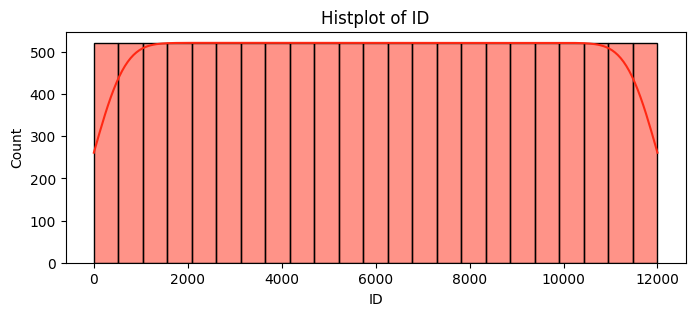

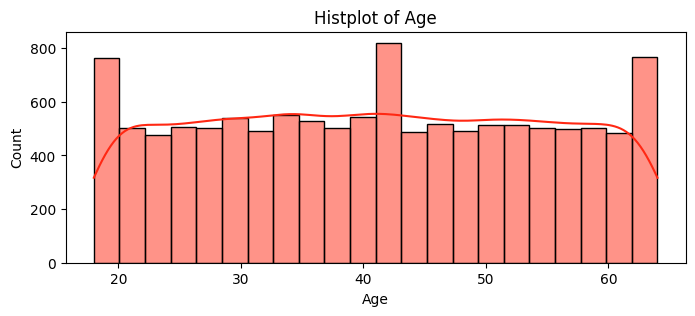

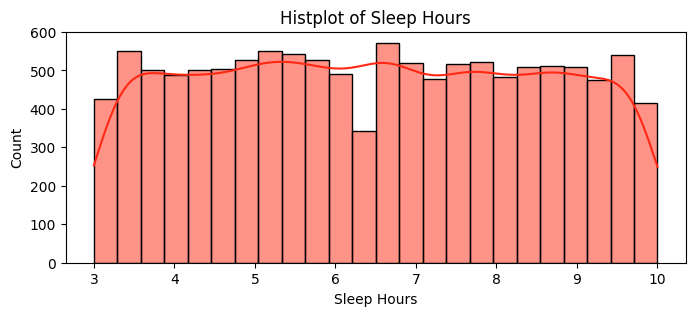

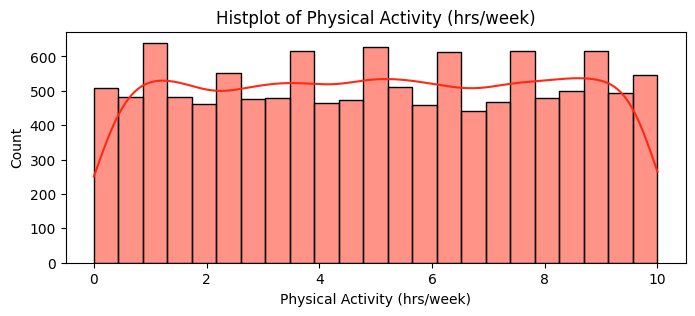

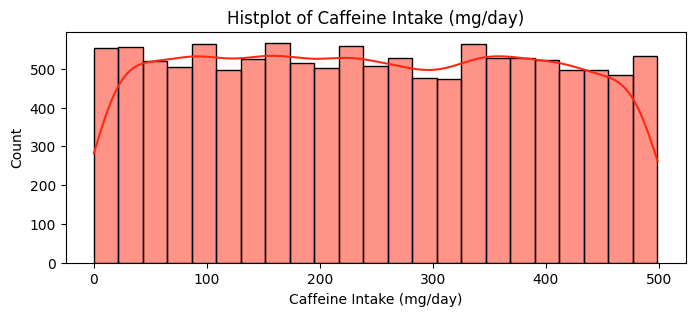

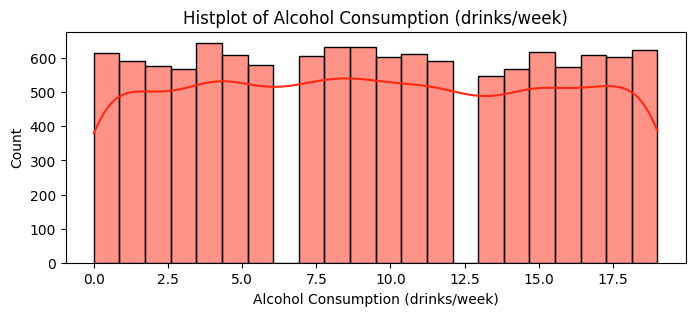

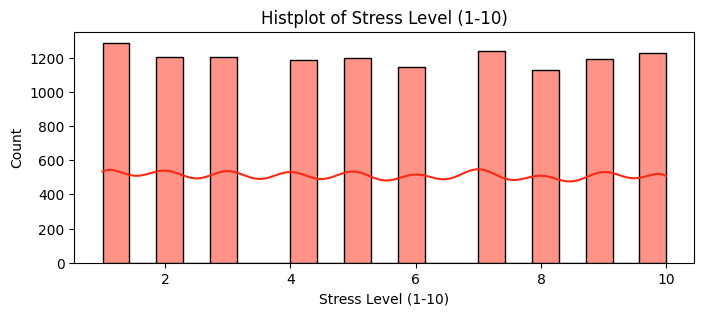

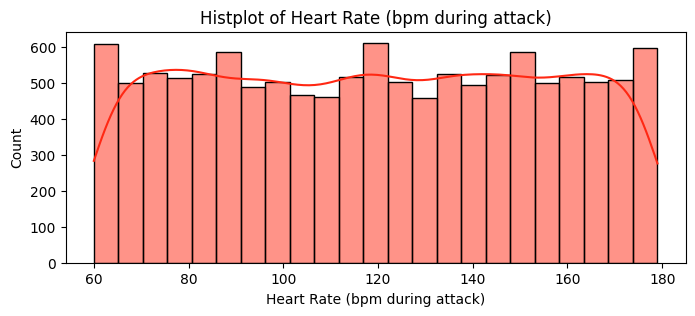

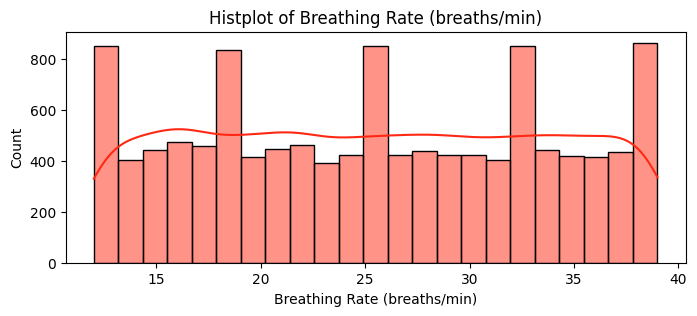

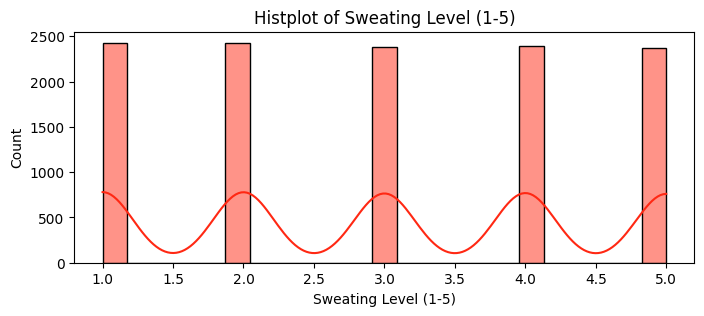

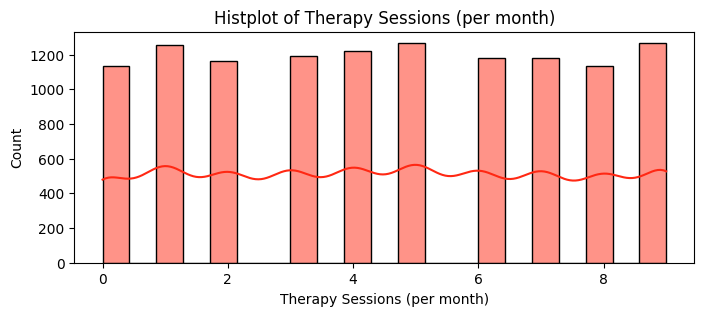

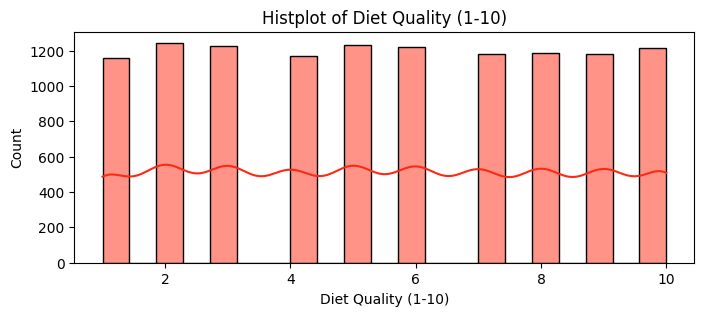

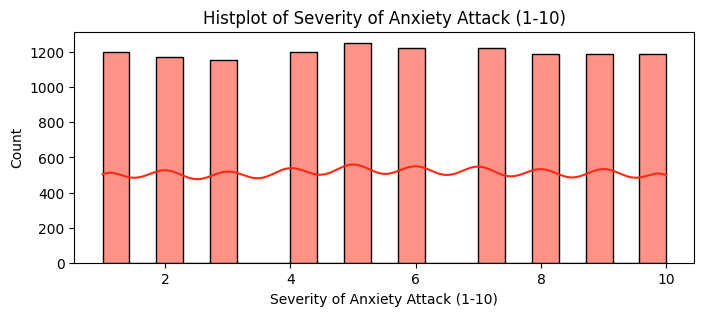

In [15]:
# a general analysis of numerical variables
for i in df[numerical_cols]:
    plt.figure(figsize=(8, 3))
    sns.histplot(x=df[i], color='#FF2813', kde=True)
    plt.title(f"Histplot of {i}")
    plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

In [52]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety',
       'Dizziness', 'Medication', 'Recent Major Life Event'],
      dtype='object')

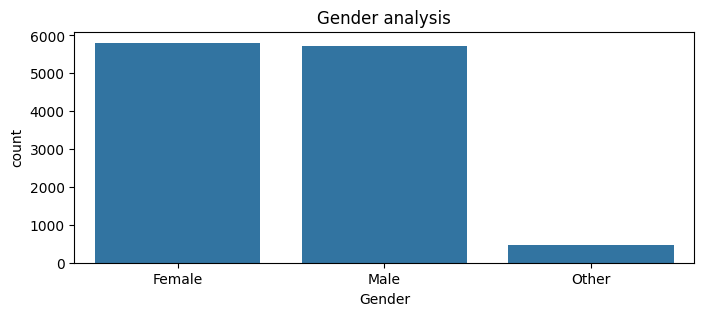

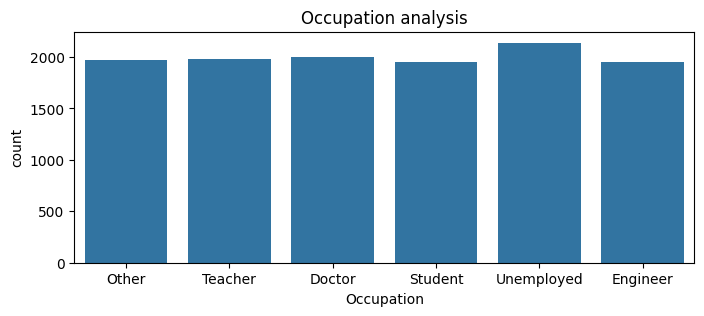

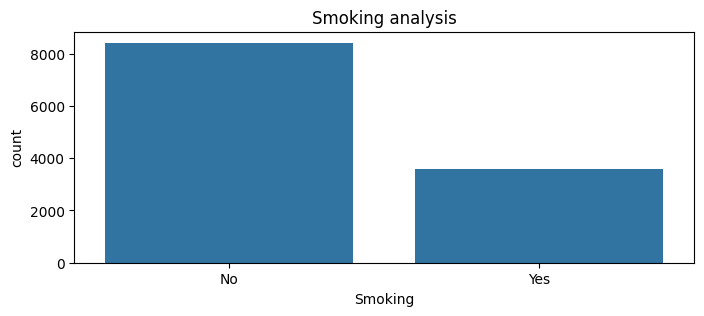

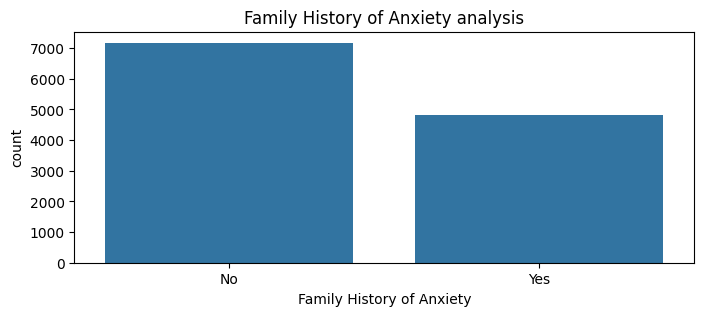

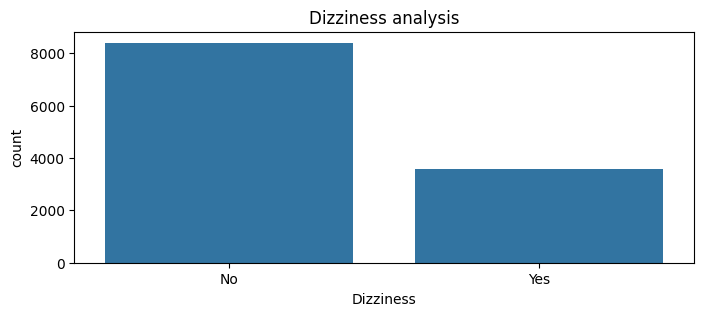

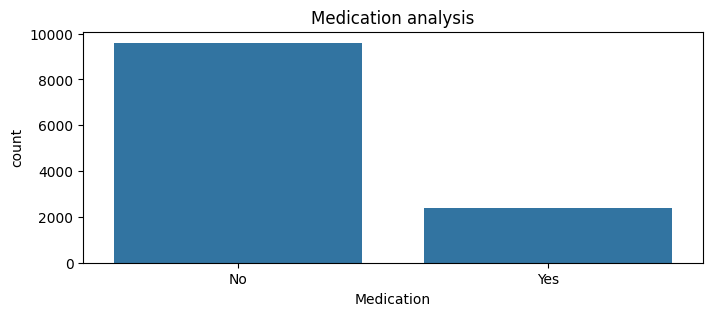

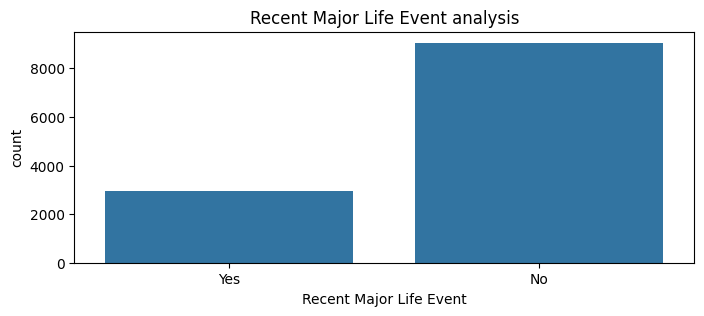

In [55]:
# categorical col analysis from all dataset
for i in categorical_cols:
    plt.figure(figsize=(8, 3))
    sns.countplot(x=df[i], data=df)
    plt.title(f"{i} analysis")
    plt.show()

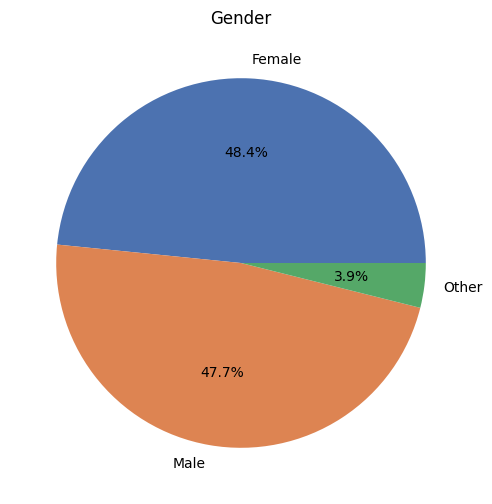

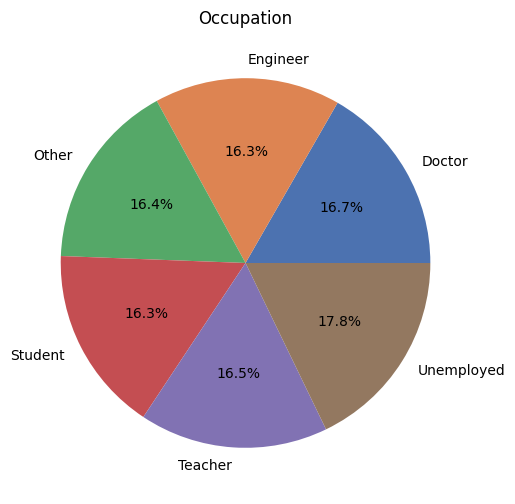

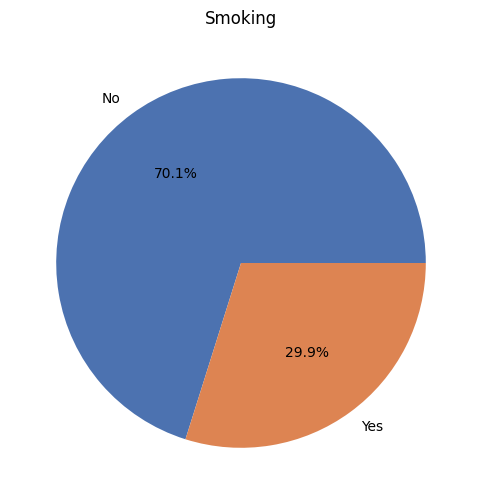

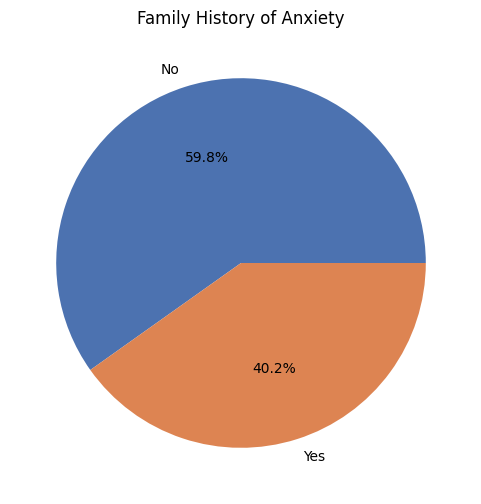

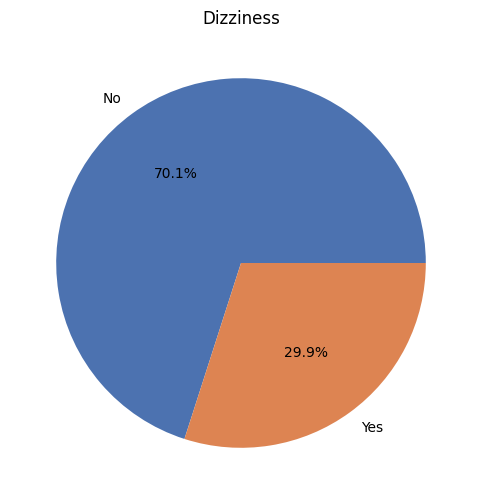

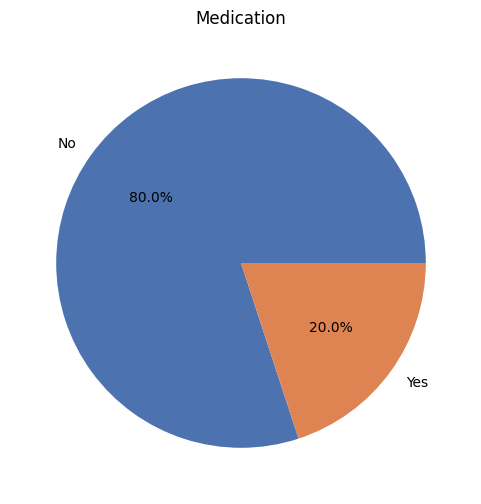

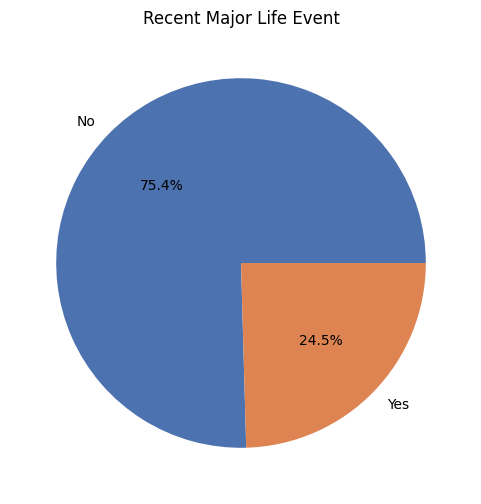

In [77]:
# pie chart for categorical values
for i in categorical_cols:
    categorical_counts = df.groupby(f"{i}").size()
    plt.figure(figsize=(6,6))
    plt.pie(categorical_counts.values, labels=categorical_counts.index, autopct='%1.1f%%', colors=sns.color_palette("deep"))
    plt.title(f"{i}")
    plt.show()

In [75]:
# Let's take a look at those whose anxiety attack was more severe
df_severity = df.loc[df['Severity of Anxiety Attack (1-10)'] >= 8]
df_severity.value_counts()

ID     Age  Gender  Occupation  Sleep Hours  Physical Activity (hrs/week)  Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  Smoking  Family History of Anxiety  Stress Level (1-10)  Heart Rate (bpm during attack)  Breathing Rate (breaths/min)  Sweating Level (1-5)  Dizziness  Medication  Therapy Sessions (per month)  Recent Major Life Event  Diet Quality (1-10)  Severity of Anxiety Attack (1-10)
11998  23   Female  Student     9.8          8.1                           140                       19                                 Yes      No                         2                    81                              33                            2                     No         No          8                             No                       1                    10                                   1
1      56   Female  Other       9.6          8.3                           175                       6                                  No       No                         4  

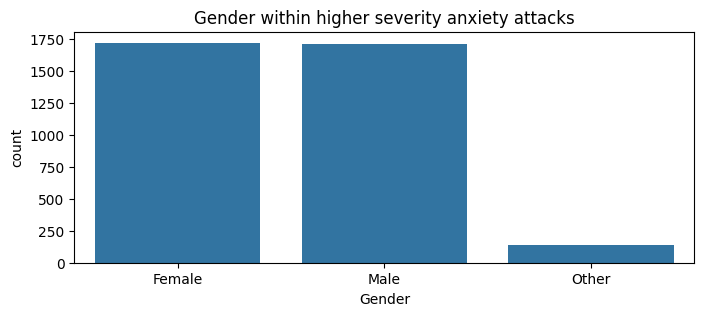

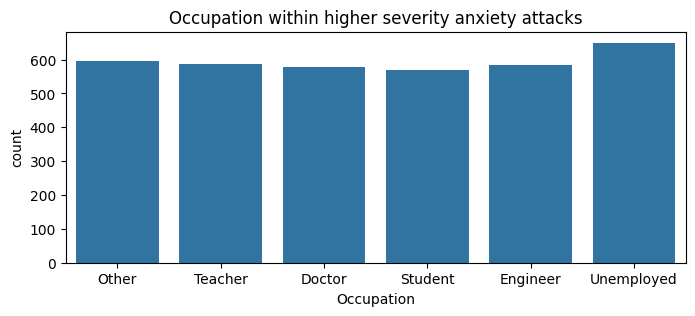

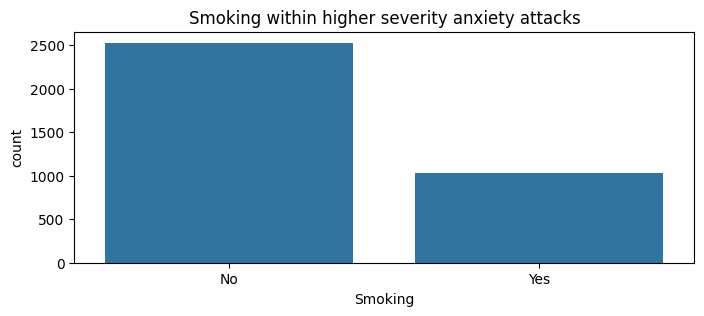

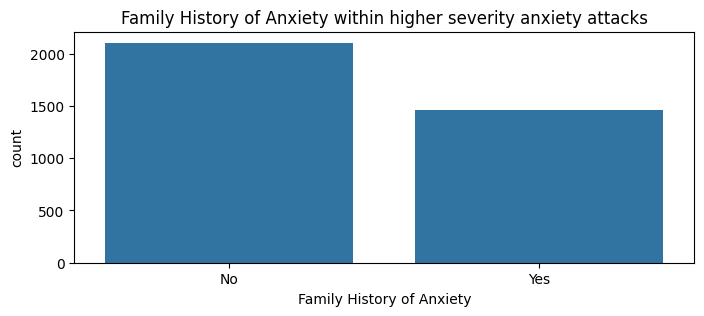

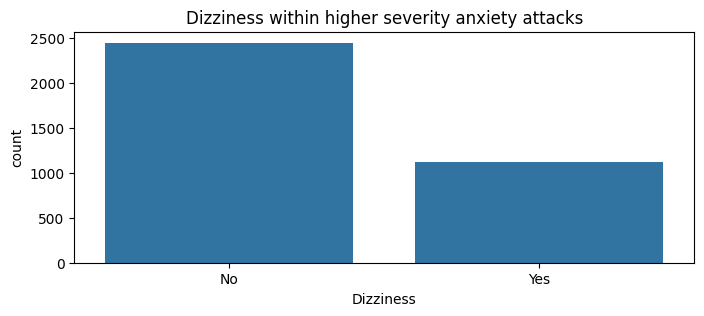

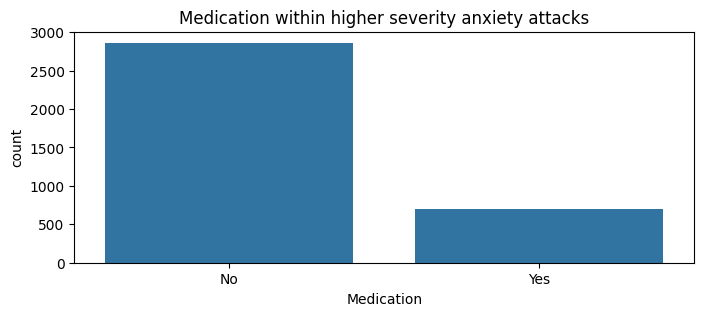

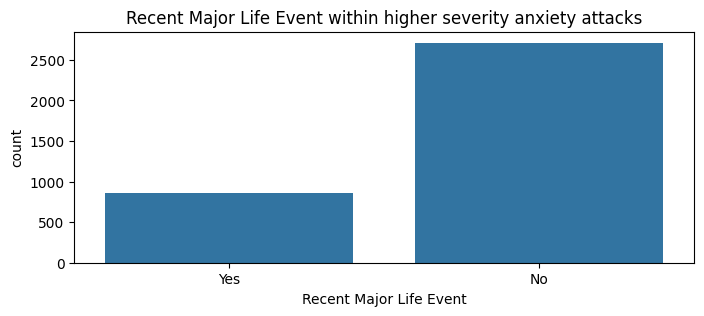

In [67]:
# categorical analysis vs high severity anxiety attack
for i in categorical_cols:
    plt.figure(figsize=(8, 3))
    sns.countplot(x=df_severity[i], data=df_severity)
    plt.title(f"{i} within higher severity anxiety attacks")
    plt.show()

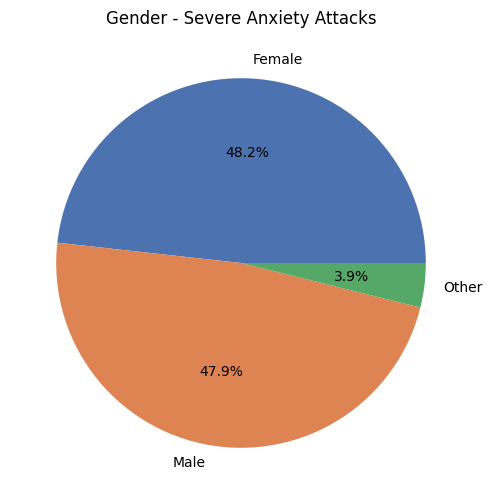

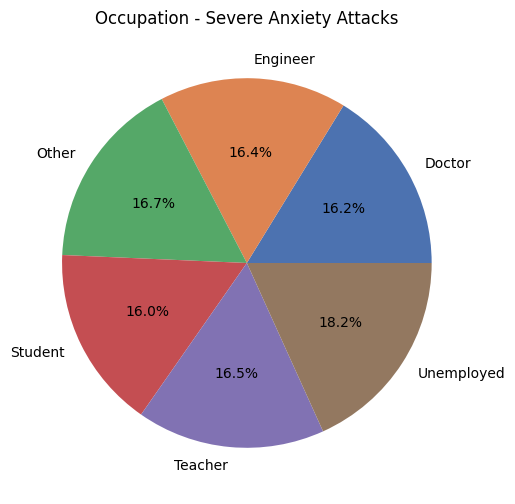

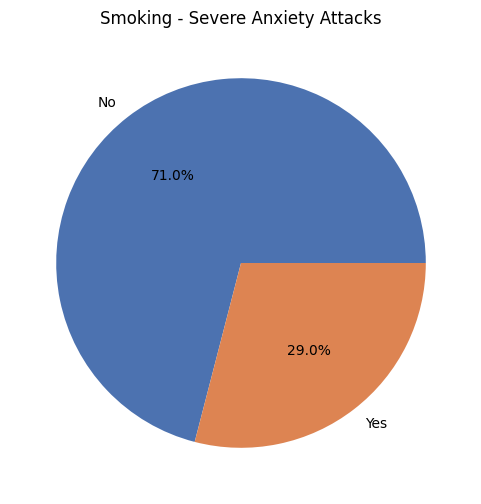

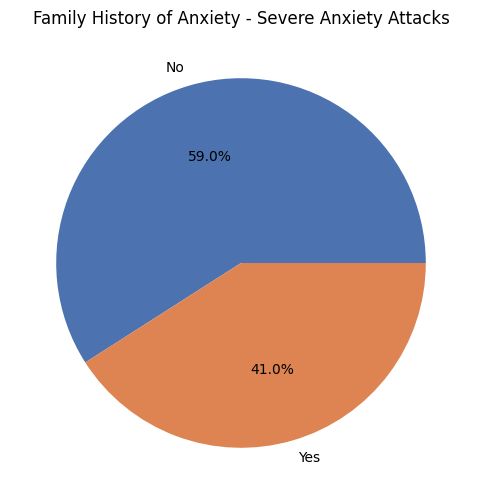

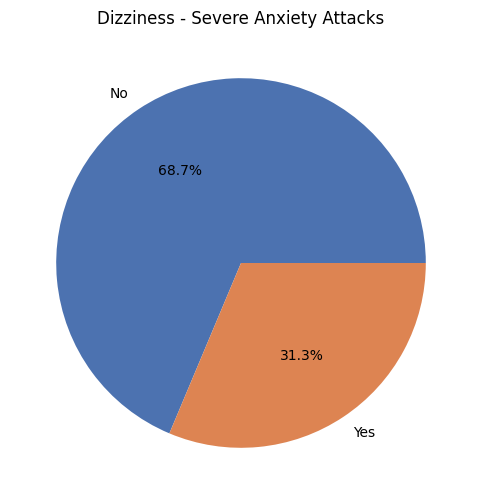

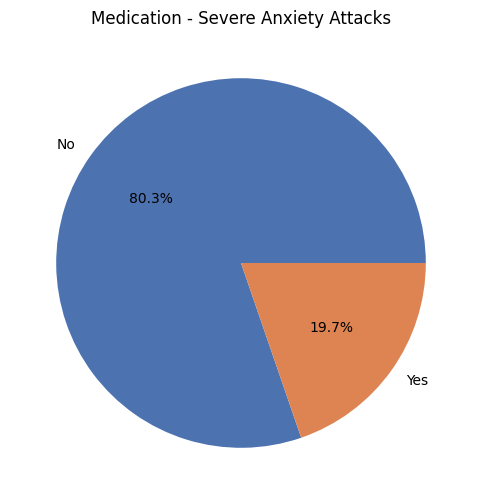

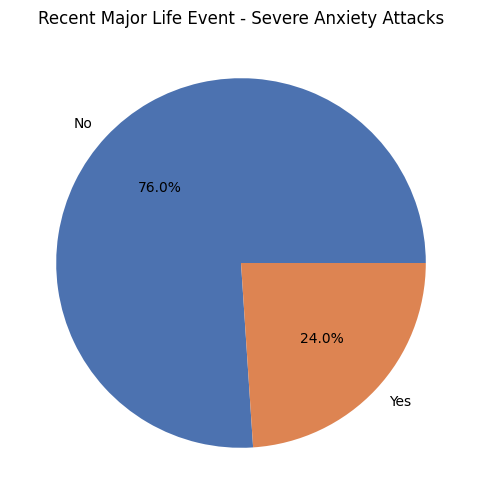

In [ ]:
# Creating a pie chart for Occupation variable
for i in categorical_cols:
    categorical_counts = df_severity.groupby(f"{i}").size()
    plt.figure(figsize=(6,6))
    plt.pie(categorical_counts.values, labels=categorical_counts.index, autopct='%1.1f%%', colors=sns.color_palette("deep"))
    plt.title(f"{i} - Severe Anxiety Attacks")
    plt.show()


In [76]:
# Let's take a look at those whose anxiety attack was less severe
df_low_severity = df.loc[df['Severity of Anxiety Attack (1-10)'] <= 3]
df_low_severity.value_counts()

ID     Age  Gender  Occupation  Sleep Hours  Physical Activity (hrs/week)  Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  Smoking  Family History of Anxiety  Stress Level (1-10)  Heart Rate (bpm during attack)  Breathing Rate (breaths/min)  Sweating Level (1-5)  Dizziness  Medication  Therapy Sessions (per month)  Recent Major Life Event  Diet Quality (1-10)  Severity of Anxiety Attack (1-10)
12000  50   Male    Teacher     6.6          7.8                           114                       0                                  No       No                         7                    107                             19                            2                     No         Yes         3                             No                       8                    2                                    1
5      25   Male    Student     9.2          2.5                           364                       2                                  No       Yes                        7  

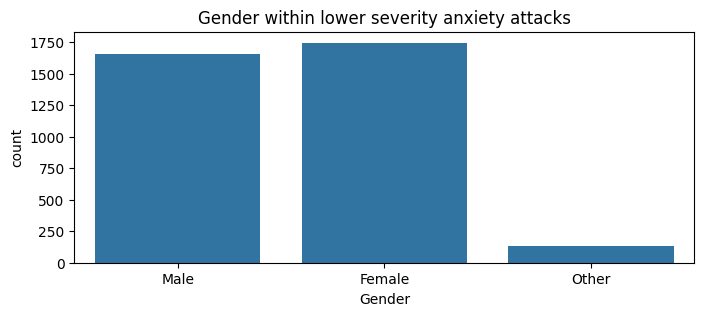

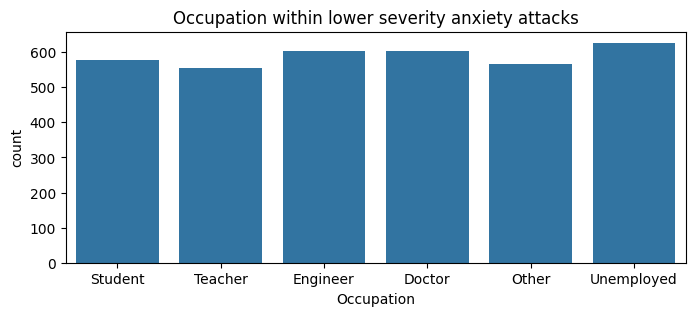

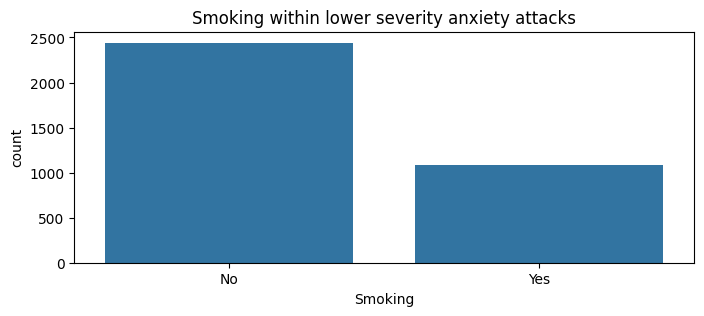

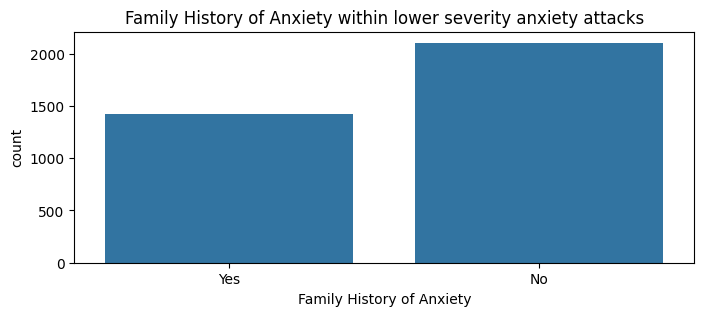

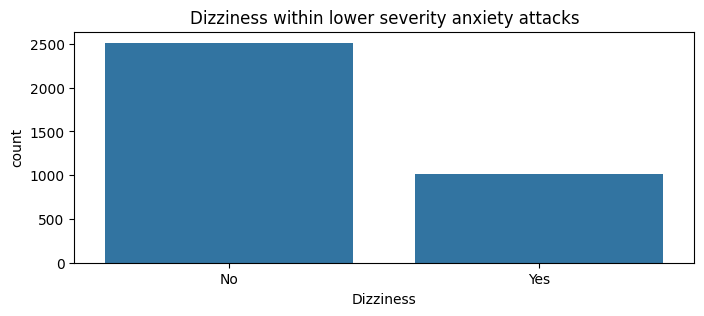

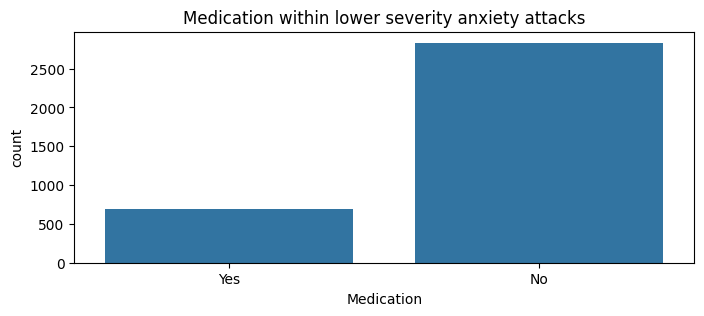

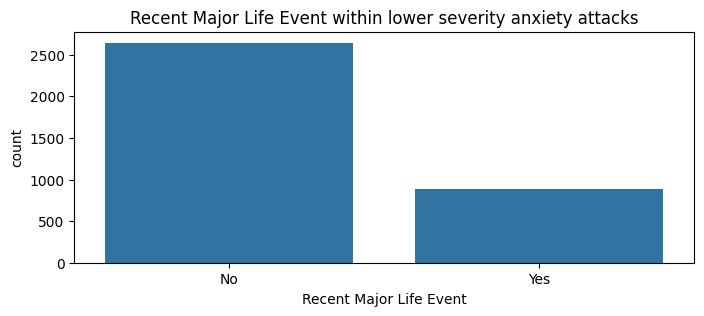

In [73]:
# categorical analysis vs high severity anxiety attack
for i in categorical_cols:
    plt.figure(figsize=(8, 3))
    sns.countplot(x=df_low_severity[i], data=df_low_severity)
    plt.title(f"{i} within lower severity anxiety attacks")
    plt.show()

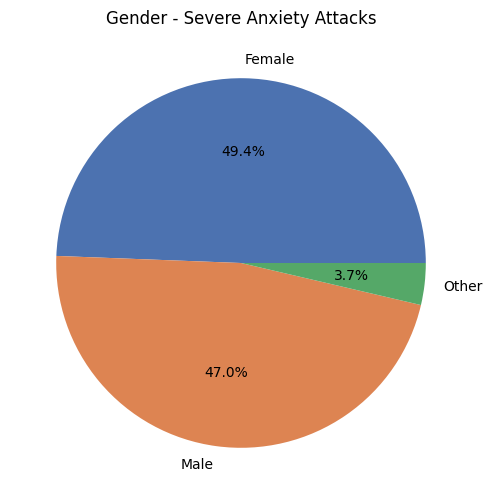

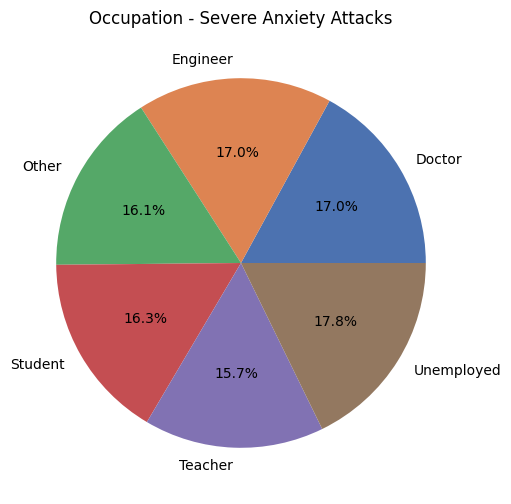

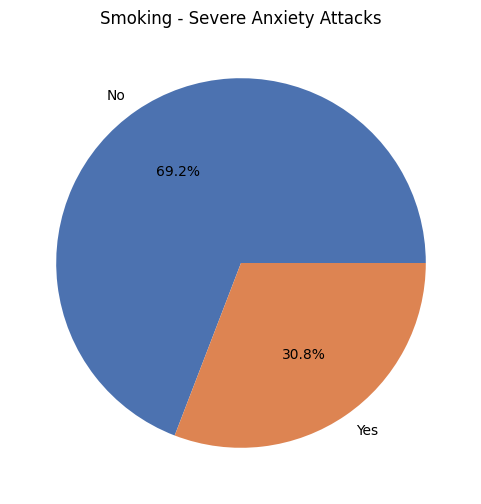

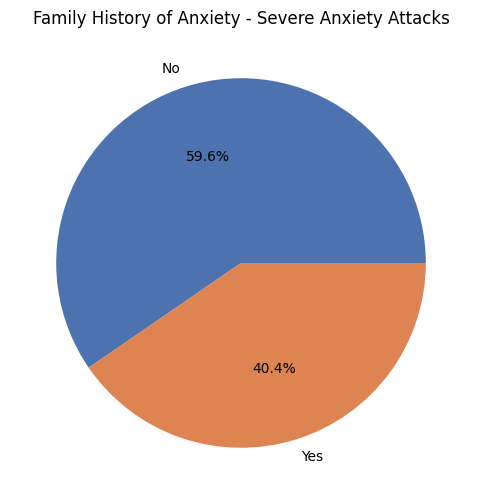

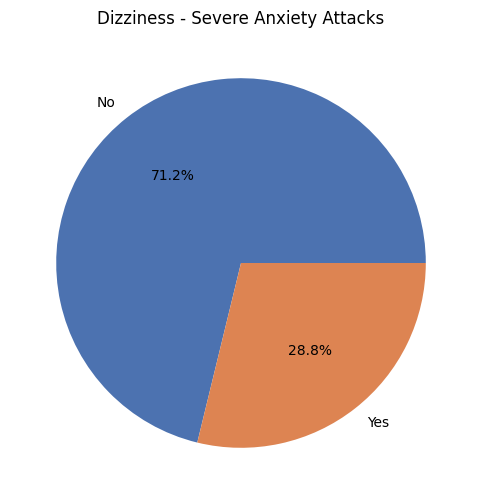

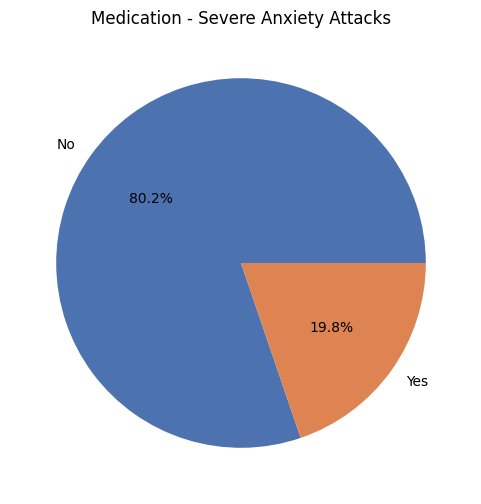

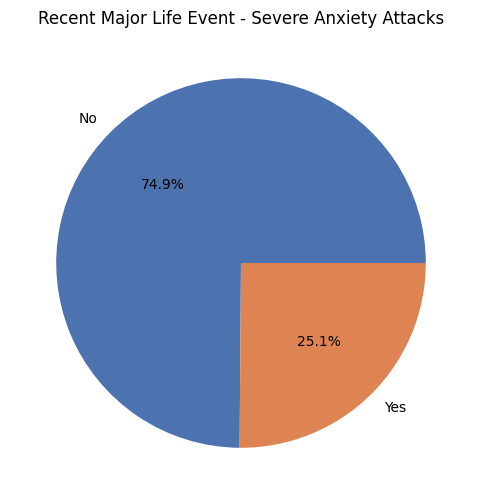

In [74]:
# Creating a pie chart for Occupation variable
for i in categorical_cols:
    categorical_counts = df_low_severity.groupby(f"{i}").size()
    plt.figure(figsize=(6,6))
    plt.pie(categorical_counts.values, labels=categorical_counts.index, autopct='%1.1f%%', colors=sns.color_palette("deep"))
    plt.title(f"{i} - Severe Anxiety Attacks")
    plt.show()